In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [2]:
from pandas import read_csv
er = pd.read_csv("USDCNY(2011-2021).csv", header=0)
er.head(5)

,slug,date,open,high,low,close,currency
0,USD/CNY,2011/1/3,6.5800,6.5800,6.5800,6.5916,CNY
1,USD/CNY,2011/1/4,6.5988,6.6000,6.5970,6.5800,CNY
2,USD/CNY,2011/1/5,6.6112,6.6112,6.5775,6.5970,CNY
3,USD/CNY,2011/1/6,6.6134,6.6165,6.6134,6.5775,CNY
4,USD/CNY,2011/1/7,6.6209,6.6209,6.6175,6.6165,CNY


In [3]:
er.date = pd.to_datetime(er.date)
er.set_index("date", inplace=True)

In [4]:
er.head()

,slug,open,high,low,close,currency
date,,,,,,
2011-01-03,USD/CNY,6.5800,6.5800,6.5800,6.5916,CNY
2011-01-04,USD/CNY,6.5988,6.6000,6.5970,6.5800,CNY
2011-01-05,USD/CNY,6.6112,6.6112,6.5775,6.5970,CNY
2011-01-06,USD/CNY,6.6134,6.6165,6.6134,6.5775,CNY
2011-01-07,USD/CNY,6.6209,6.6209,6.6175,6.6165,CNY


In [5]:
er.tail()

,slug,open,high,low,close,currency
date,,,,,,
2021-08-24,USD/CNY,6.4800,6.4832,6.4686,6.4800,CNY
2021-08-25,USD/CNY,6.4699,6.4783,6.4675,6.4699,CNY
2021-08-26,USD/CNY,6.4749,6.4856,6.4725,6.4749,CNY
2021-08-27,USD/CNY,6.4805,6.4867,6.4694,6.4805,CNY
2021-08-30,USD/CNY,6.4711,6.4717,6.4620,6.4658,CNY


In [6]:
er_price = er[['close']]

In [7]:
valid_start = '2019-8-1'
test_start =  '2020-8-3'

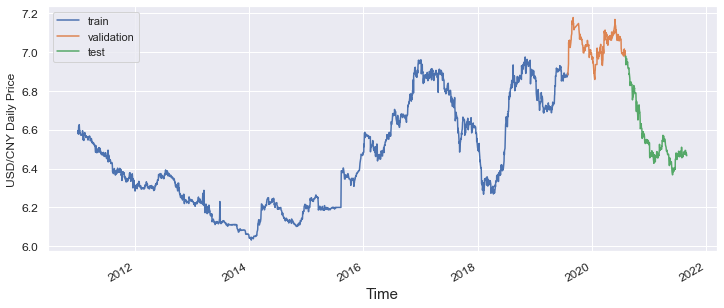

In [8]:
er_price[: valid_start][['close']].rename(columns={'close':'train'}) \
    .join(er_price[valid_start: test_start][['close']] \
          .rename(columns={'close':'validation'}), how='outer') \
    .join(er_price[test_start:][['close']].rename(columns={'close':'test'}), how='outer') \
    .plot(y=['train', 'validation', 'test'], figsize=(12, 5), fontsize=12)
plt.xlabel('Time', fontsize=15)
plt.ylabel('USD/CNY Daily Price', fontsize=12)
plt.show()

# Linear regression model when k=1

In [9]:
K = 1
HORIZON = 1

In [10]:
train_er = er_price[:valid_start].copy()

               close
date                
2011-01-03  0.593959
2011-01-04  0.581664
2019-07-31  0.903445
2019-08-01  0.903233


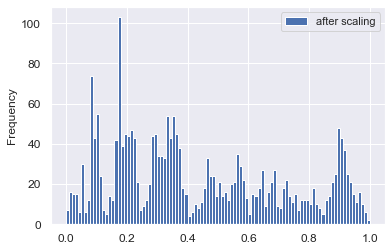

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_er['close'] = scaler.fit_transform(train_er)
print(train_er.head(2).append(train_er.tail(2)))
train_er.rename(columns={'close':'after scaling'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [12]:
train_shifted = train_er
train_shifted['close_t+1'] = train_er['close'].shift(-1)
train_shifted.head(2)

,close,close_t+1
date,,
2011-01-03,0.593959,0.581664
2011-01-04,0.581664,0.599682


In [13]:
for t in range(K):
    train_shifted['close_t-{}'.format(t)] = train_shifted['close'].shift(t)
train_shifted.head()

,close,close_t+1,close_t-0
date,,,
2011-01-03,0.593959,0.581664,0.593959
2011-01-04,0.581664,0.599682,0.581664
2011-01-05,0.599682,0.579014,0.599682
2011-01-06,0.579014,0.620350,0.579014
2011-01-07,0.620350,0.621410,0.620350


In [14]:
train_shifted = train_shifted.dropna(how='any')
train_shifted.head()

,close,close_t+1,close_t-0
date,,,
2011-01-03,0.593959,0.581664,0.593959
2011-01-04,0.581664,0.599682,0.581664
2011-01-05,0.599682,0.579014,0.599682
2011-01-06,0.579014,0.620350,0.579014
2011-01-07,0.620350,0.621410,0.620350


In [15]:
y_data = ['close_t+1']
X_data = ['close_t-{}'.format(idx) for idx in range(0, K)]

In [16]:
y_train = train_shifted[y_data].values
print(y_train.shape)
X_train = train_shifted[X_data].values
print(X_train.shape)

(2233, 1)
(2233, 1)


In [17]:
from sklearn.linear_model import LinearRegression 

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
index_pre = er_price.index.get_loc(valid_start) - K
true_valid_start = er_price.index[index_pre]

In [20]:
er_price

,close
date,
2011-01-03,6.5916
2011-01-04,6.5800
2011-01-05,6.5970
2011-01-06,6.5775
2011-01-07,6.6165
...,...
2021-08-24,6.4800
2021-08-25,6.4699
2021-08-26,6.4749


In [21]:
val_df = er_price[true_valid_start:test_start].copy()

In [22]:
val_df.head()

,close
date,
2019-07-31,6.8836
2019-08-01,6.8834
2019-08-02,6.8978
2019-08-05,6.9392
2019-08-06,7.0497


In [23]:
val_df['close'] = scaler.transform(val_df)
print(val_df.head(2).append(val_df.tail(2)))

               close
date                
2019-07-31  0.903445
2019-08-01  0.903233
2020-07-31  1.034552
2020-08-03  0.999470


In [24]:
valid_shifted = val_df.copy()
valid_shifted['close_t+1'] = val_df['close'].shift(-1)
for t in range(K):
     valid_shifted['close_t-{}'.format(t)] = valid_shifted['close'].shift(t)
valid_shifted = valid_shifted.dropna(how='any')
y_valid = valid_shifted[y_data].values
X_valid = valid_shifted[X_data].values

In [25]:
predictions = model.predict(X_valid)
eval_df = pd.DataFrame(predictions, columns=['t+'+str(t) for t in range(1, HORIZON+1)])
eval_df['timestamp'] = valid_shifted.index
eval_df = pd.melt(eval_df, id_vars='timestamp', value_name='prediction1', var_name='h')
eval_df['actual'] = np.transpose(y_valid).ravel()
eval_df[['prediction1', 'actual']] = scaler.inverse_transform(eval_df[['prediction1', 'actual']])
eval_df.head()

,timestamp,h,prediction1,actual
0,2019-07-31,t+1,6.883319,6.8834
1,2019-08-01,t+1,6.883119,6.8978
2,2019-08-02,t+1,6.897505,6.9392
3,2019-08-05,t+1,6.938867,7.0497
4,2019-08-06,t+1,7.049263,7.0256


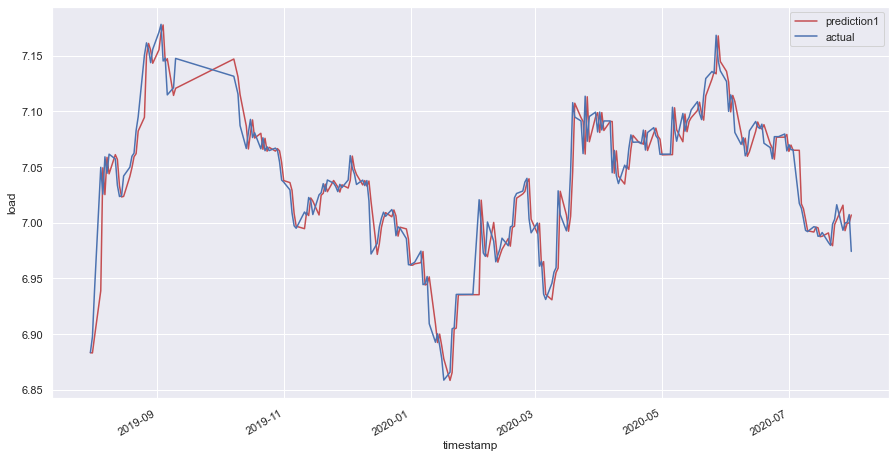

In [26]:
eval_df.plot(x='timestamp', y=['prediction1', 'actual'], style=['r', 'b'], figsize=(15, 8))
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_valid,predictions)

0.00043658336678900286

In [28]:
index_pre = er_price.index.get_loc(test_start) - K

In [29]:
true_valid_start = er_price.index[index_pre]
test_df = er_price[true_valid_start:].copy()
test_df['close'] = scaler.transform(test_df)
print(test_df.head(2).append(test_df.tail(2)))

               close
date                
2020-07-31  1.034552
2020-08-03  0.999470
2021-08-27  0.476206
2021-08-30  0.460625


In [30]:
test_shifted = test_df.copy()
test_shifted['close_t+1'] = test_shifted['close'].shift(-1)
for t in range(0, K):
     test_shifted['close_t-{}'.format(t)] = test_shifted['close'].shift(t)
test_shifted = test_shifted.dropna(how='any')
y_test = test_shifted[y_data].values
X_test = test_shifted[X_data].values

In [31]:
predictions = model.predict(X_test)

In [32]:
eval_df = pd.DataFrame(predictions, columns=['t+'+str(t) for t in range(1, HORIZON+1)])
eval_df['date'] = test_shifted.index
eval_df = pd.melt(eval_df, id_vars='date', value_name='prediction1', var_name='h')
eval_df['actual'] = np.transpose(y_test).ravel()
eval_df[['prediction1', 'actual']] = scaler.inverse_transform(eval_df[['prediction1', 'actual']])
eval_df.head()

,date,h,prediction1,actual
0,2020-07-31,t+1,7.006903,6.9742
1,2020-08-03,t+1,6.973834,6.9794
2,2020-08-04,t+1,6.979029,6.9727
3,2020-08-05,t+1,6.972335,6.9346
4,2020-08-06,t+1,6.934271,6.9524


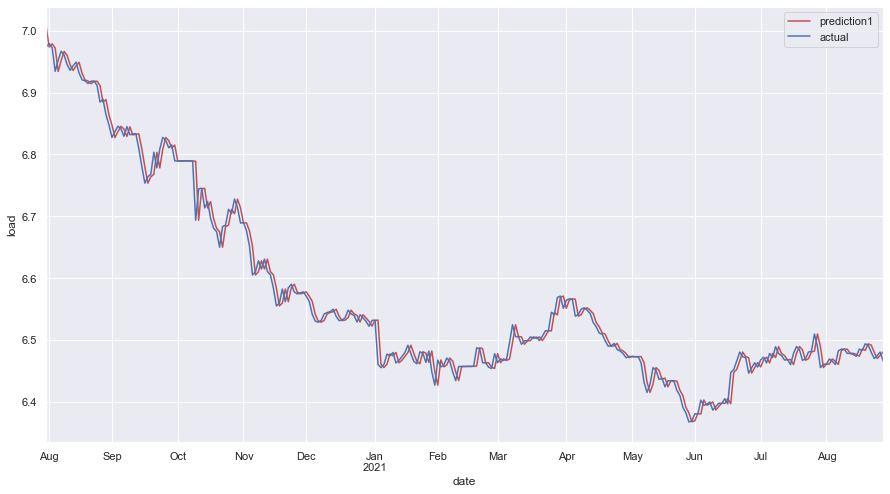

In [33]:
eval_df.plot(x='date', y=['prediction1', 'actual'], style=['r', 'b'], figsize=(15, 8))
plt.xlabel('date', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predictions)

0.0002972753527133246

In [35]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.9889984292170573

In [36]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,predictions)

0.012038473228784232

In [38]:
mape_test = np.mean(np.abs((eval_df['prediction1'] - eval_df['actual']) / eval_df['actual'])) * 100
print('Testing MAPE is {:.2f}%'.format(mape_test))

Testing MAPE is 0.17%


# Linear regression model when k=3

In [39]:
K = 3
HORIZON = 1

In [40]:
train_er = er_price[:valid_start].copy()

               close
date                
2011-01-03  0.593959
2011-01-04  0.581664
2019-07-31  0.903445
2019-08-01  0.903233


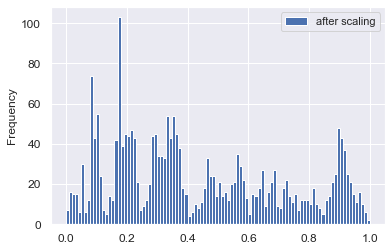

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_er['close'] = scaler.fit_transform(train_er)
print(train_er.head(2).append(train_er.tail(2)))
train_er.rename(columns={'close':'after scaling'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [42]:
train_shifted = train_er
train_shifted['close_t+1'] = train_er['close'].shift(-1)
train_shifted.head(2)

,close,close_t+1
date,,
2011-01-03,0.593959,0.581664
2011-01-04,0.581664,0.599682


In [43]:
for t in range(K):
    train_shifted['close_t-{}'.format(t)] = train_shifted['close'].shift(t)
train_shifted.head()

,close,close_t+1,close_t-0,close_t-1,close_t-2
date,,,,,
2011-01-03,0.593959,0.581664,0.593959,NaN,NaN
2011-01-04,0.581664,0.599682,0.581664,0.593959,NaN
2011-01-05,0.599682,0.579014,0.599682,0.581664,0.593959
2011-01-06,0.579014,0.620350,0.579014,0.599682,0.581664
2011-01-07,0.620350,0.621410,0.620350,0.579014,0.599682


In [44]:
train_shifted = train_shifted.dropna(how='any')
train_shifted.head()

,close,close_t+1,close_t-0,close_t-1,close_t-2
date,,,,,
2011-01-05,0.599682,0.579014,0.599682,0.581664,0.593959
2011-01-06,0.579014,0.620350,0.579014,0.599682,0.581664
2011-01-07,0.620350,0.621410,0.620350,0.579014,0.599682
2011-01-10,0.621410,0.630419,0.621410,0.620350,0.579014
2011-01-11,0.630419,0.613461,0.630419,0.621410,0.620350


In [45]:
y_data = ['close_t+1']
X_data = ['close_t-{}'.format(idx) for idx in range(0, K)]

In [46]:
y_train = train_shifted[y_data].values
print(y_train.shape)
X_train = train_shifted[X_data].values
print(X_train.shape)

(2231, 1)
(2231, 3)


In [47]:
from sklearn.linear_model import LinearRegression 

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
index_pre = er_price.index.get_loc(valid_start) - K
true_valid_start = er_price.index[index_pre]

In [50]:
er_price

,close
date,
2011-01-03,6.5916
2011-01-04,6.5800
2011-01-05,6.5970
2011-01-06,6.5775
2011-01-07,6.6165
...,...
2021-08-24,6.4800
2021-08-25,6.4699
2021-08-26,6.4749


In [51]:
val_df = er_price[true_valid_start:test_start].copy()

In [52]:
val_df.head()

,close
date,
2019-07-29,6.8782
2019-07-30,6.8924
2019-07-31,6.8836
2019-08-01,6.8834
2019-08-02,6.8978


In [53]:
val_df['close'] = scaler.transform(val_df)
print(val_df.head(2).append(val_df.tail(2)))

               close
date                
2019-07-29  0.897721
2019-07-30  0.912772
2020-07-31  1.034552
2020-08-03  0.999470


In [54]:
valid_shifted = val_df.copy()
valid_shifted['close_t+1'] = val_df['close'].shift(-1)
for t in range(K):
     valid_shifted['close_t-{}'.format(t)] = valid_shifted['close'].shift(t)
valid_shifted = valid_shifted.dropna(how='any')
y_valid = valid_shifted[y_data].values
X_valid = valid_shifted[X_data].values

In [55]:
predictions = model.predict(X_valid)
eval_df = pd.DataFrame(predictions, columns=['t+'+str(t) for t in range(1, HORIZON+1)])
eval_df['timestamp'] = valid_shifted.index
eval_df = pd.melt(eval_df, id_vars='timestamp', value_name='prediction3', var_name='h')
eval_df['actual'] = np.transpose(y_valid).ravel()
eval_df[['prediction3', 'actual']] = scaler.inverse_transform(eval_df[['prediction3', 'actual']])
eval_df.head()

,timestamp,h,prediction3,actual
0,2019-07-31,t+1,6.884023,6.8834
1,2019-08-01,t+1,6.883795,6.8978
2,2019-08-02,t+1,6.895662,6.9392
3,2019-08-05,t+1,6.932439,7.0497
4,2019-08-06,t+1,7.031642,7.0256


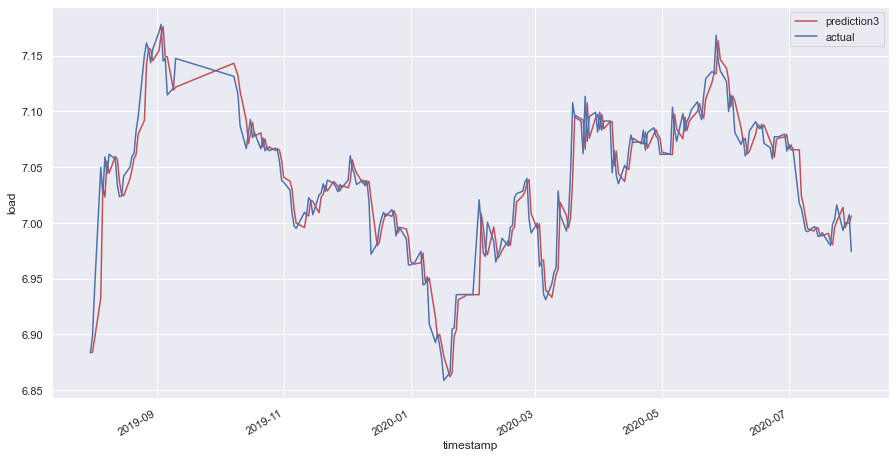

In [56]:
eval_df.plot(x='timestamp', y=['prediction3', 'actual'], style=['r', 'b'], figsize=(15, 8))
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

In [57]:
from sklearn.metrics import r2_score
r2_score(y_valid,predictions)

0.9008932255027602

In [58]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_valid,predictions)

0.0004408993038050831

In [59]:
index_pre = er_price.index.get_loc(test_start) - K

In [60]:
true_valid_start = er_price.index[index_pre]
test_df = er_price[true_valid_start:].copy()
test_df['close'] = scaler.transform(test_df)
print(test_df.head(2).append(test_df.tail(2)))

               close
date                
2020-07-29  1.026497
2020-07-30  1.027133
2021-08-27  0.476206
2021-08-30  0.460625


In [61]:
test_shifted = test_df.copy()
test_shifted['close_t+1'] = test_shifted['close'].shift(-1)
for t in range(0, K):
     test_shifted['close_t-{}'.format(t)] = test_shifted['close'].shift(t)
test_shifted = test_shifted.dropna(how='any')
y_test = test_shifted[y_data].values
X_test = test_shifted[X_data].values

In [62]:
predictions = model.predict(X_test)

In [63]:
eval_df = pd.DataFrame(predictions, columns=['t+'+str(t) for t in range(1, HORIZON+1)])
eval_df['date'] = test_shifted.index
eval_df = pd.melt(eval_df, id_vars='date', value_name='prediction3', var_name='h')
eval_df['actual'] = np.transpose(y_test).ravel()
eval_df[['prediction3', 'actual']] = scaler.inverse_transform(eval_df[['prediction3', 'actual']])
eval_df.head()

,date,h,prediction3,actual
0,2020-07-31,t+1,7.006112,6.9742
1,2020-08-03,t+1,6.978404,6.9794
2,2020-08-04,t+1,6.980236,6.9727
3,2020-08-05,t+1,6.973242,6.9346
4,2020-08-06,t+1,6.940249,6.9524


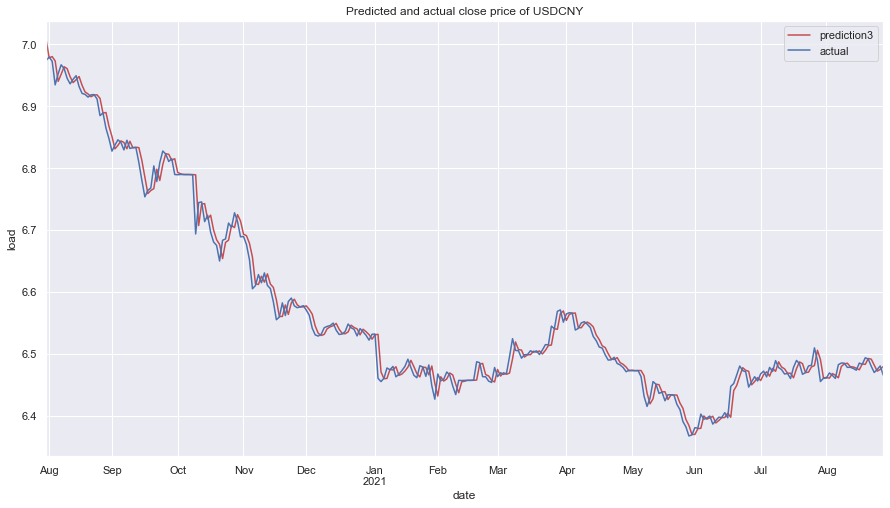

In [64]:
eval_df.plot(x='date', y=['prediction3', 'actual'], style=['r', 'b'], figsize=(15, 8))
plt.title('Predicted and actual close price of USDCNY')
plt.xlabel('date', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

In [65]:
mape_test = np.mean(np.abs((eval_df['prediction3'] - eval_df['actual']) / eval_df['actual'])) * 100
print('Testing MAPE is {:.2f}%'.format(mape_test))

Testing MAPE is 0.17%


In [66]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predictions)

0.00029585009658792105

In [67]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.9890511751174635

In [68]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,predictions)

0.011931427920367589

In [69]:
mape_test = np.mean(np.abs((eval_df['prediction3'] - eval_df['actual']) / eval_df['actual'])) * 100
print('Testing MAPE is {:.2f}%'.format(mape_test))

Testing MAPE is 0.17%


# Linear regression model when k=5

In [70]:
K = 5
HORIZON = 1

In [71]:
train_er = er_price[:valid_start].copy()

               close
date                
2011-01-03  0.593959
2011-01-04  0.581664
2019-07-31  0.903445
2019-08-01  0.903233


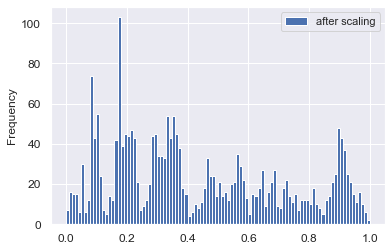

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_er['close'] = scaler.fit_transform(train_er)
print(train_er.head(2).append(train_er.tail(2)))
train_er.rename(columns={'close':'after scaling'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [73]:
train_shifted = train_er
train_shifted['close_t+1'] = train_er['close'].shift(-1)
train_shifted.head(2)

,close,close_t+1
date,,
2011-01-03,0.593959,0.581664
2011-01-04,0.581664,0.599682


In [74]:
for t in range(K):
    train_shifted['close_t-{}'.format(t)] = train_shifted['close'].shift(t)
train_shifted.head()

,close,close_t+1,close_t-0,close_t-1,close_t-2,close_t-3,close_t-4
date,,,,,,,
2011-01-03,0.593959,0.581664,0.593959,NaN,NaN,NaN,NaN
2011-01-04,0.581664,0.599682,0.581664,0.593959,NaN,NaN,NaN
2011-01-05,0.599682,0.579014,0.599682,0.581664,0.593959,NaN,NaN
2011-01-06,0.579014,0.620350,0.579014,0.599682,0.581664,0.593959,NaN
2011-01-07,0.620350,0.621410,0.620350,0.579014,0.599682,0.581664,0.593959


In [75]:
train_shifted = train_shifted.dropna(how='any')
train_shifted.head()

,close,close_t+1,close_t-0,close_t-1,close_t-2,close_t-3,close_t-4
date,,,,,,,
2011-01-07,0.620350,0.621410,0.620350,0.579014,0.599682,0.581664,0.593959
2011-01-10,0.621410,0.630419,0.621410,0.620350,0.579014,0.599682,0.581664
2011-01-11,0.630419,0.613461,0.630419,0.621410,0.620350,0.579014,0.599682
2011-01-12,0.613461,0.596714,0.613461,0.630419,0.621410,0.620350,0.579014
2011-01-13,0.596714,0.598304,0.596714,0.613461,0.630419,0.621410,0.620350


In [76]:
y_data = ['close_t+1']
X_data = ['close_t-{}'.format(idx) for idx in range(0, K)]

In [77]:
y_train = train_shifted[y_data].values
print(y_train.shape)
X_train = train_shifted[X_data].values
print(X_train.shape)

(2229, 1)
(2229, 5)


In [78]:
from sklearn.linear_model import LinearRegression 

In [79]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [80]:
index_pre = er_price.index.get_loc(valid_start) - K
true_valid_start = er_price.index[index_pre]

In [81]:
er_price

,close
date,
2011-01-03,6.5916
2011-01-04,6.5800
2011-01-05,6.5970
2011-01-06,6.5775
2011-01-07,6.6165
...,...
2021-08-24,6.4800
2021-08-25,6.4699
2021-08-26,6.4749


In [82]:
val_df = er_price[true_valid_start:test_start].copy()

In [83]:
val_df.head()

,close
date,
2019-07-25,6.8715
2019-07-26,6.8716
2019-07-29,6.8782
2019-07-30,6.8924
2019-07-31,6.8836


In [84]:
val_df['close'] = scaler.transform(val_df)
print(val_df.head(2).append(val_df.tail(2)))

               close
date                
2019-07-25  0.890620
2019-07-26  0.890726
2020-07-31  1.034552
2020-08-03  0.999470


In [85]:
valid_shifted = val_df.copy()
valid_shifted['close_t+1'] = val_df['close'].shift(-1)
for t in range(K):
     valid_shifted['close_t-{}'.format(t)] = valid_shifted['close'].shift(t)
valid_shifted = valid_shifted.dropna(how='any')
y_valid = valid_shifted[y_data].values
X_valid = valid_shifted[X_data].values

In [86]:
predictions = model.predict(X_valid)
eval_df = pd.DataFrame(predictions, columns=['t+'+str(t) for t in range(1, HORIZON+1)])
eval_df['timestamp'] = valid_shifted.index
eval_df = pd.melt(eval_df, id_vars='timestamp', value_name='prediction5', var_name='h')
eval_df['actual'] = np.transpose(y_valid).ravel()
eval_df[['prediction5', 'actual']] = scaler.inverse_transform(eval_df[['prediction5', 'actual']])
eval_df.head()

,timestamp,h,prediction5,actual
0,2019-07-31,t+1,6.884255,6.8834
1,2019-08-01,t+1,6.884400,6.8978
2,2019-08-02,t+1,6.895611,6.9392
3,2019-08-05,t+1,6.932346,7.0497
4,2019-08-06,t+1,7.032678,7.0256


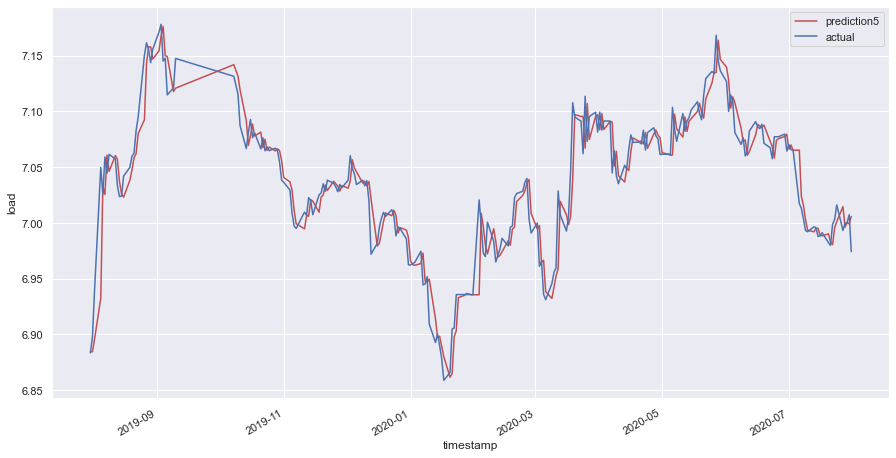

In [87]:
eval_df.plot(x='timestamp', y=['prediction5', 'actual'], style=['r', 'b'], figsize=(15, 8))
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

In [88]:
from sklearn.metrics import r2_score
r2_score(y_valid,predictions)

0.9009672098497299

In [89]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_valid,predictions)

0.00044057016740409654

In [90]:
index_pre = er_price.index.get_loc(test_start) - K

In [91]:
true_valid_start = er_price.index[index_pre]
test_df = er_price[true_valid_start:].copy()
test_df['close'] = scaler.transform(test_df)
print(test_df.head(2).append(test_df.tail(2)))

               close
date                
2020-07-27  1.043879
2020-07-28  1.019608
2021-08-27  0.476206
2021-08-30  0.460625


In [92]:
test_shifted = test_df.copy()
test_shifted['close_t+1'] = test_shifted['close'].shift(-1)
for t in range(0, K):
     test_shifted['close_t-{}'.format(t)] = test_shifted['close'].shift(t)
test_shifted = test_shifted.dropna(how='any')
y_test = test_shifted[y_data].values
X_test = test_shifted[X_data].values

In [93]:
predictions = model.predict(X_test)

In [94]:
eval_df = pd.DataFrame(predictions, columns=['t+'+str(t) for t in range(1, HORIZON+1)])
eval_df['date'] = test_shifted.index
eval_df = pd.melt(eval_df, id_vars='date', value_name='prediction5', var_name='h')
eval_df['actual'] = np.transpose(y_test).ravel()
eval_df[['prediction5', 'actual']] = scaler.inverse_transform(eval_df[['prediction5', 'actual']])
eval_df.head()

,date,h,prediction5,actual
0,2020-07-31,t+1,7.005770,6.9742
1,2020-08-03,t+1,6.978420,6.9794
2,2020-08-04,t+1,6.980297,6.9727
3,2020-08-05,t+1,6.971995,6.9346
4,2020-08-06,t+1,6.939443,6.9524


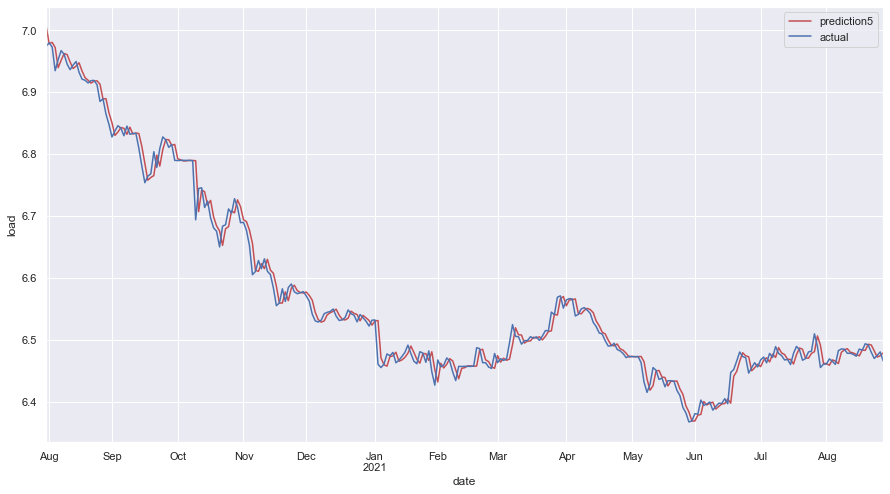

In [95]:
eval_df.plot(x='date', y=['prediction5', 'actual'], style=['r', 'b'], figsize=(15, 8))
plt.xlabel('date', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

In [96]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predictions)

0.0002961509076784938

In [97]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.9890400426960401

In [98]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,predictions)

0.012025339731606766

In [99]:
mape_test = np.mean(np.abs((eval_df['prediction5'] - eval_df['actual']) / eval_df['actual'])) * 100
print('Testing MAPE is {:.2f}%'.format(mape_test))

Testing MAPE is 0.17%


# Linear regression model when k=7

In [100]:
K = 7
HORIZON = 1

In [101]:
train_er = er_price[:valid_start].copy()

               close
date                
2011-01-03  0.593959
2011-01-04  0.581664
2019-07-31  0.903445
2019-08-01  0.903233


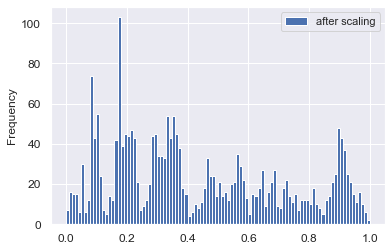

In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_er['close'] = scaler.fit_transform(train_er)
print(train_er.head(2).append(train_er.tail(2)))
train_er.rename(columns={'close':'after scaling'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [103]:
train_shifted = train_er
train_shifted['close_t+1'] = train_er['close'].shift(-1)
train_shifted.head(2)

,close,close_t+1
date,,
2011-01-03,0.593959,0.581664
2011-01-04,0.581664,0.599682


In [104]:
for t in range(K):
    train_shifted['close_t-{}'.format(t)] = train_shifted['close'].shift(t)
train_shifted.head()

,close,close_t+1,close_t-0,close_t-1,close_t-2,close_t-3,close_t-4,close_t-5,close_t-6
date,,,,,,,,,
2011-01-03,0.593959,0.581664,0.593959,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04,0.581664,0.599682,0.581664,0.593959,NaN,NaN,NaN,NaN,NaN
2011-01-05,0.599682,0.579014,0.599682,0.581664,0.593959,NaN,NaN,NaN,NaN
2011-01-06,0.579014,0.620350,0.579014,0.599682,0.581664,0.593959,NaN,NaN,NaN
2011-01-07,0.620350,0.621410,0.620350,0.579014,0.599682,0.581664,0.593959,NaN,NaN


In [105]:
train_shifted = train_shifted.dropna(how='any')
train_shifted.head()

,close,close_t+1,close_t-0,close_t-1,close_t-2,close_t-3,close_t-4,close_t-5,close_t-6
date,,,,,,,,,
2011-01-11,0.630419,0.613461,0.630419,0.621410,0.620350,0.579014,0.599682,0.581664,0.593959
2011-01-12,0.613461,0.596714,0.613461,0.630419,0.621410,0.620350,0.579014,0.599682,0.581664
2011-01-13,0.596714,0.598304,0.596714,0.613461,0.630419,0.621410,0.620350,0.579014,0.599682
2011-01-14,0.598304,0.580816,0.598304,0.596714,0.613461,0.630419,0.621410,0.620350,0.579014
2011-01-17,0.580816,0.585162,0.580816,0.598304,0.596714,0.613461,0.630419,0.621410,0.620350


In [106]:
y_data = ['close_t+1']
X_data = ['close_t-{}'.format(idx) for idx in range(0, K)]

In [107]:
y_train = train_shifted[y_data].values
print(y_train.shape)
X_train = train_shifted[X_data].values
print(X_train.shape)

(2227, 1)
(2227, 7)


In [108]:
from sklearn.linear_model import LinearRegression 

In [109]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [110]:
index_pre = er_price.index.get_loc(valid_start) - K
true_valid_start = er_price.index[index_pre]

In [111]:
er_price

,close
date,
2011-01-03,6.5916
2011-01-04,6.5800
2011-01-05,6.5970
2011-01-06,6.5775
2011-01-07,6.6165
...,...
2021-08-24,6.4800
2021-08-25,6.4699
2021-08-26,6.4749


In [112]:
val_df = er_price[true_valid_start:test_start].copy()

In [113]:
val_df.head()

,close
date,
2019-07-23,6.8801
2019-07-24,6.8783
2019-07-25,6.8715
2019-07-26,6.8716
2019-07-29,6.8782


In [114]:
val_df['close'] = scaler.transform(val_df)
print(val_df.head(2).append(val_df.tail(2)))

               close
date                
2019-07-23  0.899735
2019-07-24  0.897827
2020-07-31  1.034552
2020-08-03  0.999470


In [115]:
valid_shifted = val_df.copy()
valid_shifted['close_t+1'] = val_df['close'].shift(-1)
for t in range(K):
     valid_shifted['close_t-{}'.format(t)] = valid_shifted['close'].shift(t)
valid_shifted = valid_shifted.dropna(how='any')
y_valid = valid_shifted[y_data].values
X_valid = valid_shifted[X_data].values

In [116]:
predictions = model.predict(X_valid)
eval_df = pd.DataFrame(predictions, columns=['t+'+str(t) for t in range(1, HORIZON+1)])
eval_df['timestamp'] = valid_shifted.index
eval_df = pd.melt(eval_df, id_vars='timestamp', value_name='prediction7', var_name='h')
eval_df['actual'] = np.transpose(y_valid).ravel()
eval_df[['prediction7', 'actual']] = scaler.inverse_transform(eval_df[['prediction7', 'actual']])
eval_df.head()

,timestamp,h,prediction7,actual
0,2019-07-31,t+1,6.884022,6.8834
1,2019-08-01,t+1,6.884413,6.8978
2,2019-08-02,t+1,6.895770,6.9392
3,2019-08-05,t+1,6.932586,7.0497
4,2019-08-06,t+1,7.032222,7.0256


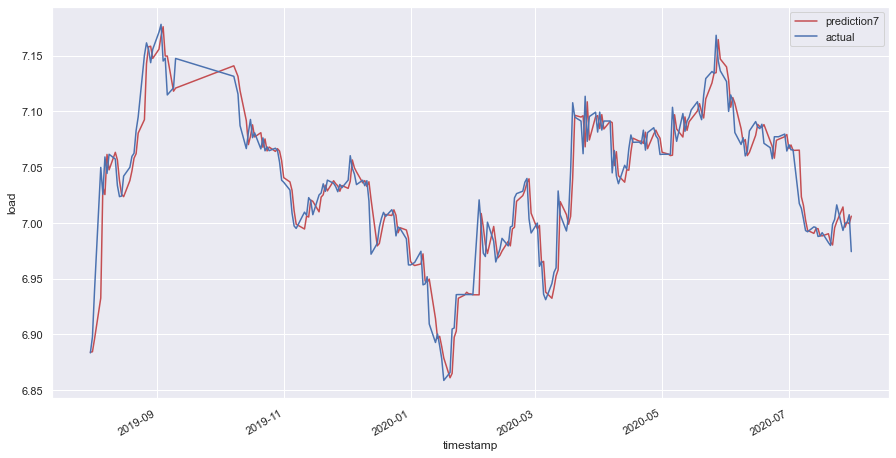

In [117]:
eval_df.plot(x='timestamp', y=['prediction7', 'actual'], style=['r', 'b'], figsize=(15, 8))
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

In [118]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_valid,predictions)

0.00043832151046420946

In [119]:
index_pre = er_price.index.get_loc(test_start) - K

In [120]:
true_valid_start = er_price.index[index_pre]
test_df = er_price[true_valid_start:].copy()
test_df['close'] = scaler.transform(test_df)
print(test_df.head(2).append(test_df.tail(2)))

               close
date                
2020-07-23  1.025437
2020-07-24  1.030101
2021-08-27  0.476206
2021-08-30  0.460625


In [121]:
test_shifted = test_df.copy()
test_shifted['close_t+1'] = test_shifted['close'].shift(-1)
for t in range(0, K):
     test_shifted['close_t-{}'.format(t)] = test_shifted['close'].shift(t)
test_shifted = test_shifted.dropna(how='any')
y_test = test_shifted[y_data].values
X_test = test_shifted[X_data].values

In [122]:
predictions = model.predict(X_test)

In [123]:
eval_df = pd.DataFrame(predictions, columns=['t+'+str(t) for t in range(1, HORIZON+1)])
eval_df['date'] = test_shifted.index
eval_df = pd.melt(eval_df, id_vars='date', value_name='prediction7', var_name='h')
eval_df['actual'] = np.transpose(y_test).ravel()
eval_df[['prediction7', 'actual']] = scaler.inverse_transform(eval_df[['prediction7', 'actual']])
eval_df.head()

,date,h,prediction7,actual
0,2020-07-31,t+1,7.005992,6.9742
1,2020-08-03,t+1,6.977818,6.9794
2,2020-08-04,t+1,6.980466,6.9727
3,2020-08-05,t+1,6.971949,6.9346
4,2020-08-06,t+1,6.939530,6.9524


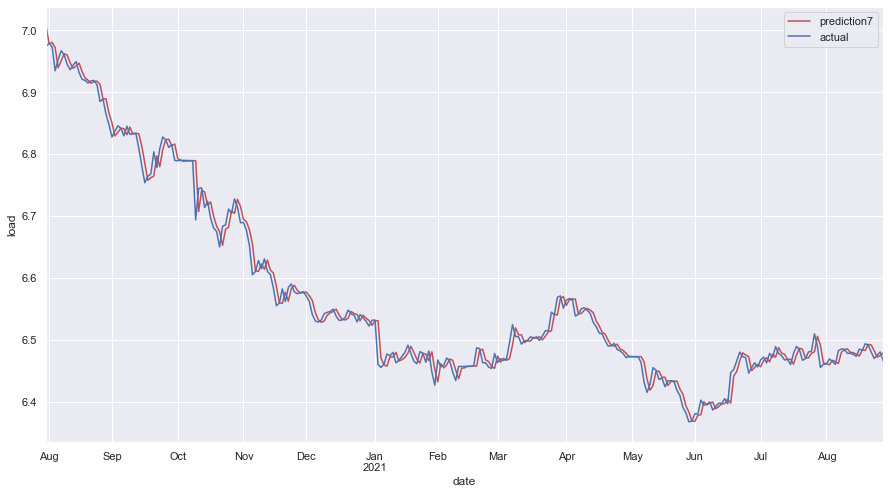

In [124]:
eval_df.plot(x='date', y=['prediction7', 'actual'], style=['r', 'b'], figsize=(15, 8))
plt.xlabel('date', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

In [125]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predictions)

0.00029620796291920373

In [126]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.9890379311948224

In [127]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,predictions)

0.012017301570291222

In [128]:
mape_test = np.mean(np.abs((eval_df['prediction7'] - eval_df['actual']) / eval_df['actual'])) * 100
print('Testing MAPE is {:.2f}%'.format(mape_test))

Testing MAPE is 0.17%


According to MSE and r2_score, for the linear regression model, best performance is achieved when k=3